
# 4a. Introduction to Sympy

**Exercise 1**: In class we saw the equality expression "==" in Sympy sometimes gives *false negatives*, i.e. it might say two expressions are not equal, when they are. 

Find a way to use Sympy's [**simplify**](https://docs.sympy.org/latest/tutorial/simplification.html) command to verify the two expressions

$$\frac{1}{\sqrt{2}-1} \text{ and } \sqrt{2} + 1$$

are equal.

In [1]:
import sympy as sp

In [2]:
x = 1/(sp.sqrt(2) - 1)
y = sp.sqrt(2) + 1 
x == y

False

In [3]:
print(sp.simplify(x))
print(sp.simplify(y))

1 + sqrt(2)
1 + sqrt(2)


In [4]:
sp.simplify(x) == sp.simplify(y)

True

----

**Exercise 2**:

Write a function $f(n)$ that returns a Sympy polynomial that is the degree $2n$ Taylor expansion of the $\cos x$ function.

$$T^{2n}(x) = 1 - \frac{x^2}{2!}x^2 + \frac{x^4}{4!}x^4 + \cdots + (-1)^n\frac{x^{2n}}{(2n)!}x^{2n}$$

Print out these polynomials for $n=1,2,3,4,5$ and use Sympy to compute the
derivative of these polynomials.


In [5]:
import math
x = sp.Symbol('x')

In [6]:
p = x**2
sp.pprint(p)

 2
x 


In [22]:
def f(n):
    f = 1 
    for i in range(1,n+1):
        f += (-1)**(i) *x**(2*i) * x**(2*i)/ math.factorial(2*i)
    return f

In [28]:
for i in range(1,6):
    print("for n =", i , "; ", f(i))

for n = 1 ;  -x**4/2 + 1
for n = 2 ;  x**8/24 - x**4/2 + 1
for n = 3 ;  -x**12/720 + x**8/24 - x**4/2 + 1
for n = 4 ;  x**16/40320 - x**12/720 + x**8/24 - x**4/2 + 1
for n = 5 ;  -x**20/3628800 + x**16/40320 - x**12/720 + x**8/24 - x**4/2 + 1


In [30]:
for i in range(1, 6):
    d = sp.diff(f(i))
    print(d)

-2*x**3
x**7/3 - 2*x**3
-x**11/60 + x**7/3 - 2*x**3
x**15/2520 - x**11/60 + x**7/3 - 2*x**3
-x**19/181440 + x**15/2520 - x**11/60 + x**7/3 - 2*x**3


----

**Exercise 3**:

 Compute the composite of the Taylor polynomial from Ex.2 with the function $x^2$, i.e. $T^{2n}(x^2)$ for $n=1,2,3,4,5$.

From Calculus, this is a Taylor polynomial (of the appropriate order) for the function $\cos(x^2)$.

Use Sympy to compute the integrals:
$$\int_0^x \cos(x^2) dx$$ 
$$\int_0^x T^{2n}(x^2) dx \text{  for  } n=1,2,3,4,5.$$

Put the plots of these functions in one common matplotlib plot, so that they can be compared.  Make the domain of the plot $[-2\pi,2\pi]$.  How big do you need to make $n$ to ensure these two plots look the same, on the domain $[-2\pi, 2\pi]$?

**Advice**: You can replace a variable with another in a Sympy expression with the [subs](https://docs.sympy.org/latest/tutorial/basic_operations.html) (substitute) command.

**Advice**: You might find that due to the polynomials being extremely large towards the ends of the integration, it will help to set the **y-limits** of your plot to reasonable numbers such as $-2.0$ and $2.0$. Otherwise your plot's y-scale could be so large that it distorts the most interesting features of your functions.  Look up the [ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html) command for *pyplot*.


In [34]:
def g(n):
    """ Takes function f from above, replace x with x**2 and return a function g """
    g = f(n).subs(x, x**2)
    return(g)

In [36]:
for i in range(1,6):
    print(g(i))

-x**8/2 + 1
x**16/24 - x**8/2 + 1
-x**24/720 + x**16/24 - x**8/2 + 1
x**32/40320 - x**24/720 + x**16/24 - x**8/2 + 1
-x**40/3628800 + x**32/40320 - x**24/720 + x**16/24 - x**8/2 + 1


In [42]:
def G(n):
    """Integrate function g wrt to x"""
    G = sp.integrate(g(i), x)
    return(G)

In [44]:
for i in range(1,6):
    print(G(i))

-x**9/18 + x
x**17/408 - x**9/18 + x
-x**25/18000 + x**17/408 - x**9/18 + x
x**33/1330560 - x**25/18000 + x**17/408 - x**9/18 + x
-x**41/148780800 + x**33/1330560 - x**25/18000 + x**17/408 - x**9/18 + x


In [50]:
h = sp.cos(x**2)
H = sp.integrate(h, x) ## integrate cos(x**2)
sp.pprint(H)

              ⎛√2⋅x⎞       
√2⋅√π⋅fresnelc⎜────⎟⋅Γ(1/4)
              ⎝ √π ⎠       
───────────────────────────
          8⋅Γ(5/4)         


In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-2, 2)

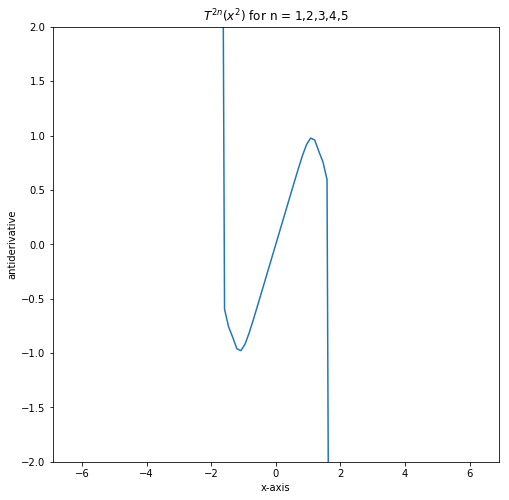

In [67]:
plt.figure(figsize=(8,8))

X = np.linspace(-2* np.pi, 2*np.pi, 100)
Y = [G(5).subs({x:p}).evalf() for p in X]
plt.plot(X,Y)
plt.title("$T^{2n}(x^2)$ for n = 1,2,3,4,5")
plt.xlabel('x-axis')
plt.ylabel('antiderivative')
plt.ylim(-2,2)

(-2, 2)

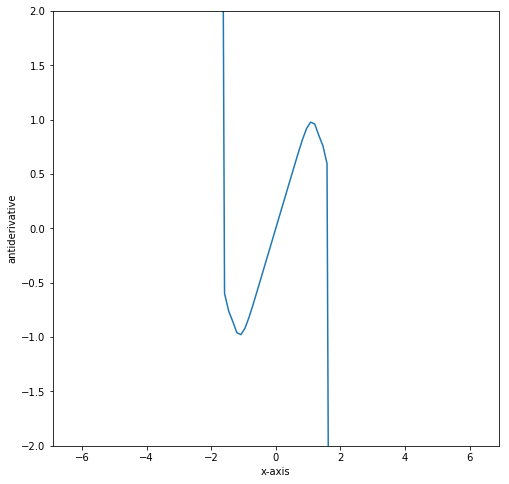

In [68]:
plt.figure(figsize=(8,8))
Y2 = [H.subs({x:p}).evalf() for p in X]
plt.plot(X,Y)
plt.xlabel('x-axis')
plt.ylabel('antiderivative')
plt.ylim(-2,2)